The Pair Trading strategy is a type of statistical arbitrage strategy that relies on buying and selling two highly cointegrated financial assets simultaneously. When a price difference develops between these two financial assets, known as a spread, the idea is to buy the weaker asset and short the stronger one. 

In this project, we will explore the idea of the Pair Trading strategy and determine if two stocks, Visa (V) and Mastercard (MA), are cointegrated in a given time period. Proving cointegration is essential for this strategy to work as cointegration leads to the conclusion that the spread of these two stocks will eventually revert to the mean.

To check for cointegration, we will use linear regression on the adjusted closing price for both stocks and use this to calculate the residual, which is the difference between the observed value and the value from the regression line. We will utilize the Augmented Dickey-Fuller Test, which checks if a time series is a stationary process. The confirmation of stationarity means that the time series will be mean reverting and that a Pair Trading strategy can be implemented between these two stocks in the given time frame. 

In [1]:
# Importing relevant libraries and reading in stock data 
import yfinance as yf
import seaborn as sns
import pandas as pd
from pandas_datareader import data as pdr
from datetime import datetime
import matplotlib.pyplot as plt
from scipy.stats import linregress
import statsmodels.tsa.stattools as ts

yf.pdr_override()
assets = ['V', 'MA']
start_date = datetime(2020, 8, 16)
end_date = datetime(2023, 8, 16)
df = pd.DataFrame()

df = pdr.get_data_yahoo(assets, start=start_date, end=end_date)['Adj Close']
print(df.head())

[*********************100%%**********************]  2 of 2 completed
                    MA           V
Date                              
2020-08-17  324.815094  195.295670
2020-08-18  325.572418  194.884384
2020-08-19  326.949493  196.823349
2020-08-20  331.788879  199.917816
2020-08-21  331.572388  199.898270


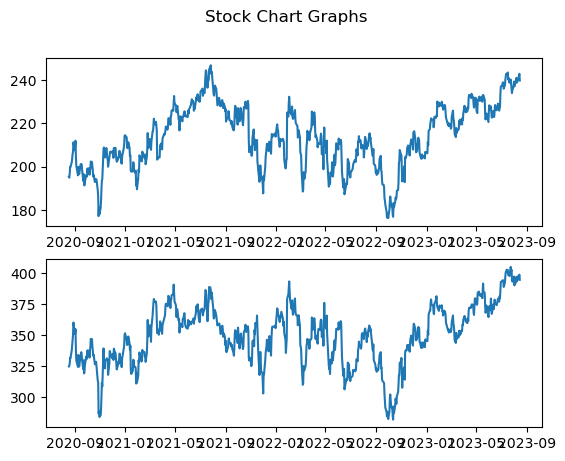

In [2]:
# Visualizing Visa and Mastercard 
visa = df['V']
mastercard = df['MA']

# Graphs of Visa and Mastercard
fig, axs = plt.subplots(2)
fig.suptitle('Stock Chart Graphs')
axs[0].plot(visa)
axs[1].plot(mastercard)

# Here we can see that the stock prices of Visa and Mastercard move similarly
plt.show()

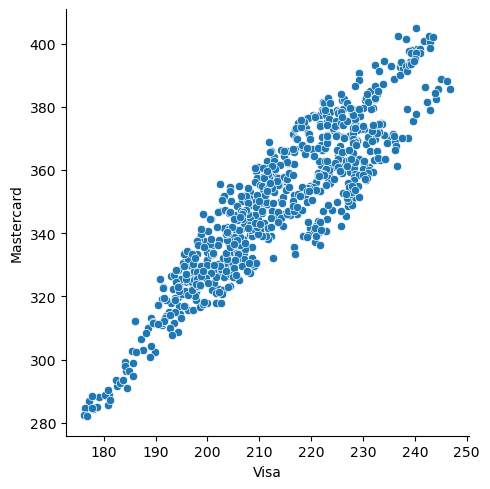

In [3]:
# Creating scatter plot with Visa on x-axis and Mastercard on y-axis
chart = sns.relplot(data=df, x='V', y='MA', kind='scatter')
chart.set_xlabels('Visa')
chart.set_ylabels('Mastercard')

# Here we see it is clear that there is a linear relationship between Visa and Mastercard Stock Prices
plt.show()

In [4]:
# We can now use linear regression to estimate the strength of the relationship
linreg = linregress(visa.values, mastercard.values)
print(linreg)

# r = 0.908 shows these two stocks are highly correlated however correlation alone isn't enough

LinregressResult(slope=1.4784642113076842, intercept=33.807743617826134, rvalue=0.9087571965807733, pvalue=1.2649031988149198e-287, stderr=0.024758748410575612, intercept_stderr=5.301226363099205)


In [5]:
# Next we must calculate the residuals
# Residuals are the difference between the observed value and the value of the regression line
residuals = visa.values - linreg.slope * mastercard.values

# Use Augmented Dickey Fuller test to check if Time Series is stationary
augmented_dickey_fuller = ts.adfuller(residuals)
print(augmented_dickey_fuller)

(-3.7087809472311486, 0.003991323941338543, 0, 753, {'1%': -3.4390641198617864, '5%': -2.8653859408474482, '10%': -2.5688179819544312}, 4775.436036495165)


Since -3.708 is less than the 1% threshold of -3.439 we can say with 99% confidence that the residual series is a stationary process. With 99% confidence, we can apply the Pairs Trading strategy to Visa and Mastercard during the time period from 08/16/2020 - 08/16/2023. Within this time period, these stocks are co-integrated which means that any price action creating a spread will eventually revert back to the mean.